## Quantização escalar

In [ ]:
from qdrant_client import QdrantClient, models
import os

client = QdrantClient(url=os.getenv("QDRANT_URL"), api_key=os.getenv("QDRANT_API_KEY"))

# For Colab:
# from google.colab import userdata
# client = QdrantClient(url=userdata.get("QDRANT_URL"), api_key=userdata.get("QDRANT_API_KEY"))

# Scalar quantization setup
client.create_collection(
    collection_name="scalar_collection",
    vectors_config=models.VectorParams(
        size=1536,
        distance=models.Distance.COSINE,
        on_disk=True,  # Move originals to disk
    ),
    quantization_config=models.ScalarQuantization(
        scalar=models.ScalarQuantizationConfig(
            type=models.ScalarType.INT8,
            quantile=0.99,  # Exclude extreme 1% of values
            always_ram=True,  # Keep quantized vectors in RAM
        )
    ),
)

## Quantização binária

In [ ]:
# Binary quantization setup  
client.create_collection(
    collection_name="binary_collection",
    vectors_config=models.VectorParams(
        size=1536,
        distance=models.Distance.COSINE,
        on_disk=True,
    ),
    quantization_config=models.BinaryQuantization(
        binary=models.BinaryQuantizationConfig(
            encoding=models.BinaryQuantizationEncoding.ONE_BIT,
            always_ram=True,
        )
    ),
)

## Quantização de produto

In [ ]:
# Product quantization setup
client.create_collection(
    collection_name="pq_collection",
    vectors_config=models.VectorParams(
        size=1024,
        distance=models.Distance.COSINE,
        on_disk=True,
    ),
    quantization_config=models.ProductQuantization(
        product=models.ProductQuantizationConfig(
            compression=models.CompressionRatio.X32, #or X4, X8, X16, X32 and X64
            always_ram=True,
        )
    ),
)

## Comparação de quantização

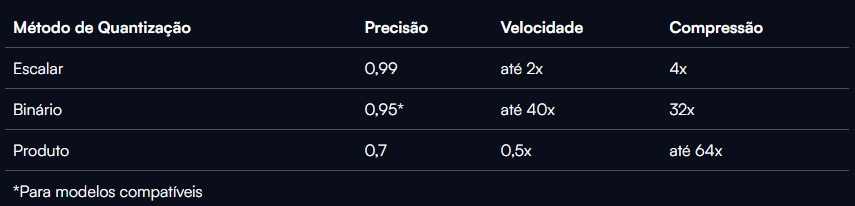